# Description of Dataset

## About Dataset

### Introduction
This dataset provides insights into factors influencing hiring decisions. Each record represents a candidate with various attributes considered during the hiring process. The goal is to predict whether a candidate will be hired based on these attributes.

### Variables Description
**Age**
- Description: Age of the candidate.
- Data Range: 20 to 50 years.
- Data Type: Integer.

**Gender**
- Description: Gender of the candidate.
- Categories: Male (0) or Female (1).
- Data Type: Binary.

**Education Level**
- Description: Highest level of education attained by the candidate.
- Categories:
  - 1: Bachelor's (Type 1)
  - 2: Bachelor's (Type 2)
  - 3: Master's
  - 4: PhD
- Data Type: Categorical.

**Experience Years**
- Description: Number of years of professional experience.
- Data Range: 0 to 15 years.
- Data Type: Integer.

**Previous Companies Worked**
- Description: Number of previous companies where the candidate has worked.
- Data Range: 1 to 5 companies.
- Data Type: Integer.

**Distance From Company**
- Description: Distance in kilometers from the candidate's residence to the hiring company.
- Data Range: 1 to 50 kilometers.
- Data Type: Float (continuous).

**Interview Score**
- Description: Score achieved by the candidate in the interview process.
- Data Range: 0 to 100.
- Data Type: Integer.

**Skill Score**
- Description: Assessment score of the candidate's technical skills.
- Data Range: 0 to 100.
- Data Type: Integer.

**Personality Score**
- Description: Evaluation score of the candidate's personality traits.
- Data Range: 0 to 100.
- Data Type: Integer.

**Recruitment Strategy**
- Description: Strategy adopted by the hiring team for recruitment.
- Categories:
  - 1: Aggressive
  - 2: Moderate
  - 3: Conservative
- Data Type: Categorical.

**Hiring Decision (Target Variable)**
- Description: Outcome of the hiring decision.
- Categories:
  - 0: Not hired
  - 1: Hired
- Data Type: Binary (Integer).

### Dataset Information
- Records: 1500
- Features: 10
- Target Variable: HiringDecision (Binary)

### Conclusion
This dataset offers a comprehensive view of candidate attributes and recruitment factors crucial for predicting hiring decisions. It serves as a valuable resource for exploring machine learning models and strategies aimed at optimizing recruitment processes in various organizational contexts.

[Dataset on Kaggle](https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data/data)


#RECRUITMENT DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
recruitment_data = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/recruitment_data.csv")
recruitment_data

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


# ⏩ EXPLORING THE DATA

In [ ]:
print(f"recruitment_data.shape is:\n {recruitment_data.shape}")
print(100*"-")
print(f"Number of null values in each column:\n{recruitment_data.isnull().sum()}")
print(100*"-")
print(f"Number of duplicate rows:\n {recruitment_data.duplicated().sum()}")
print(100*"-")
print(f"Descriptive statistics of DataFrame:\n {recruitment_data.describe()}")
print(100*"-")


recruitment_data.shape is:
 (1500, 11)
----------------------------------------------------------------------------------------------------
Number of null values in each column:
Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64
----------------------------------------------------------------------------------------------------
Number of duplicate rows:
 0
----------------------------------------------------------------------------------------------------
Descriptive statistics of DataFrame:
                Age       Gender  EducationLevel  ExperienceYears  \
count  1500.000000  1500.000000     1500.000000      1500.000000   
mean     35.148667     0.492000        2.188000         7.694000   
std       9.252728     0.500103        0.862449         4.641

Τι Δείχνει ο Πίνακας Συσχέτισης
Τιμές Συσχέτισης
Οι τιμές του συντελεστή συσχέτισης κυμαίνονται από -1 έως 1.

1: Τέλεια θετική γραμμική συσχέτιση. Όταν η μία μεταβλητή αυξάνεται, η άλλη αυξάνεται αναλογικά.
-1: Τέλεια αρνητική γραμμική συσχέτιση. Όταν η μία μεταβλητή αυξάνεται, η άλλη μειώνεται αναλογικά.
0: Καμία γραμμική συσχέτιση. Οι μεταβλητές δεν παρουσιάζουν καμία γραμμική σχέση.

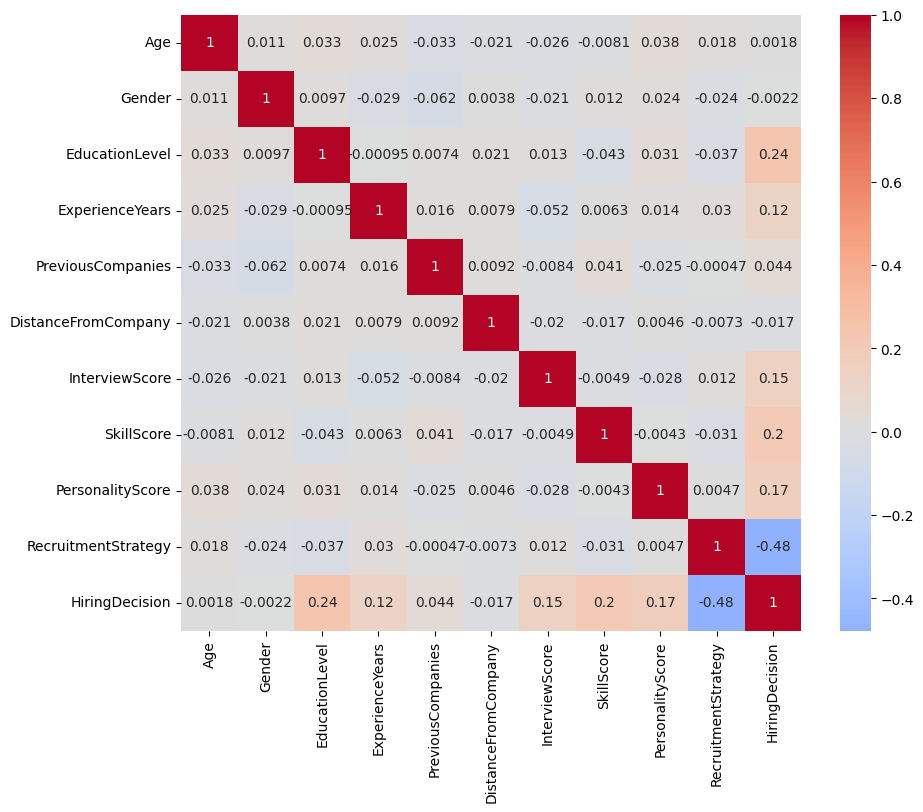

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming recruitment_data is your DataFrame
correlation_matrix = recruitment_data.corr()

# # Display the correlation matrix
# print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()


# ⏩AUTOMATING ML PIPELINES

In [ ]:
!pip install catboost

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import random

np.random.seed(100)


X = recruitment_data.drop('HiringDecision', axis=1)
y = recruitment_data['HiringDecision']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_train.shape, y_train.shape, y_test.shape)

param_knn_grid = {
        'n_neighbors': list(range(2, 9, 2)),
        'p': [1, 2, random.random()]
    }


param_dec_tree_grid = {
        'criterion': ["gini", "entropy", "log_loss"],
        'splitter': ["best", "random"]
    }


param_log_reg_grid =  {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'solver': ['liblinear', 'saga'],
        'multi_class': ['auto', 'ovr', 'multinomial']
    }


param_svc_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'decision_function_shape': ['ovo', 'ovr']
    }


# param_rf_grid = {
#     "n_estimators": [100, 200, 300],
#     "max_features": ["auto", "sqrt", "log2"],
#     "max_depth": [4, 6, 8, 10],
#     "criterion": ["gini", "entropy"]
# }



param_grad_boost_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.05],
    "max_depth": [3, 4, 5]
}



param_xgb_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.05],
    "max_depth": [3, 4, 5],
    "colsample_bytree": [0.3, 0.7]
}

# param_lgbm_grid = {
#     "n_estimators": [100, 200, 300],
#     "learning_rate": [0.01, 0.1, 0.05],
#     "max_depth": [3, 4, 5],
#     "num_leaves": [31, 50, 70]
# }


param_catboost_grid = {
    "iterations": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.05],
    "depth": [3, 4, 5]
}


param_adaboost_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.05]
}


# param_bagging_grid = {
#     "n_estimators": [10, 50, 100],
#     "max_samples": [0.5, 0.7, 1.0],
#     "max_features": [0.5, 0.7, 1.0]
# }


# param_extra_trees_grid = {
#     "n_estimators": [100, 200, 300],
#     "max_features": ["auto", "sqrt", "log2"],
#     "max_depth": [4, 6, 8, 10],
#     "criterion": ["gini", "entropy"]
# }


# param_mlp_grid = {
#     "hidden_layer_sizes": [(50,), (100,), (50, 50)],
#     "activation": ["tanh", "relu"],
#     "solver": ["sgd", "adam"],
#     "alpha": [0.0001, 0.05],
#     "learning_rate": ["constant", "adaptive"]
# }


# estimators to explore
estimators_to_compute = [
    ("knn", GridSearchCV(KNeighborsClassifier(), param_knn_grid, cv = 5)), # cv = 5 : Χρήση StratifiedKFold μέσα στο GridSearchCV, όπου k = 5
    ("dec_tree",GridSearchCV(DecisionTreeClassifier(),param_dec_tree_grid, cv = 5)),
    ("log_reg", GridSearchCV(LogisticRegression(), param_log_reg_grid, cv = 5)),
    ("SVM", GridSearchCV(SVC(probability=True), param_svc_grid, cv = 5)),
    ("random_forest",RandomForestClassifier()),
    ("grad_boost", GradientBoostingClassifier()),
    ("xgb", XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)),
    # ("lgbm", LGBMClassifier()),
    ("catboost", CatBoostClassifier(verbose=0)),
    # ("naive_bayes", GaussianNB()),
    ("adaboost", AdaBoostClassifier())
    # # ("bagging", BaggingClassifier()),
    # ("extra_trees", ExtraTreesClassifier()),
    # ("mlp", MLPClassifier(max_iter=1000))
]


computed_estimators = []
model_scores = []
# for each of the above estimators
for model_name, model in estimators_to_compute: # estimators_to_compute has tuples with 2 elements each
    # execute these steps: scaling, dimensionality reduction, apply model_name according to specifications in model
    # the pipeline knows it should use the best_estimator_ of the GridSearch, without any further coding by our side
    pipe=Pipeline([("scaler", StandardScaler()), ("dim_red", PCA(n_components=5)), (model_name, model)])
    pipe.fit(X_train,y_train) # do the fitting, fit_transform is executed automatically
    # done! get the accuracy score and the confusion matrix
    print(f"The ML pipeline of {pipe[2]}\n has a score of:  {pipe.score(X_test, y_test)}")
    print(f" and its confusion matrix is:\n {metrics.confusion_matrix(y_test, pipe.predict(X_test))}\n")
    computed_estimators.append((model_name,pipe[2])) # pipe [2] is the model e.g GridSearchCV(KNeighborsClassifier(), param_knn_grid))
    score = pipe.score(X_test, y_test)
    # append model name and score to the list
    model_scores.append((model_name, score))

# Now that we have the trained models, we build an ensemble learning pipeline as well
ensemble_pipe=Pipeline([('scaler', StandardScaler()), ("dim_red", PCA(n_components=5)), ("ensemble", VotingClassifier(computed_estimators, voting='hard'))])
ensemble_pipe.fit(X_train,y_train)
model_scores_df = pd.DataFrame(model_scores, columns=['Model', 'Score'])
print(f"The ML pipeline of {ensemble_pipe[2]}\n has a score of:  {ensemble_pipe.score(X_test, y_test)}")
print(f" and its confusion matrix is:\n {metrics.confusion_matrix(y_test, ensemble_pipe.predict(X_test))}")


(1200, 10) (1200, 10) (1200,) (300,)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Mi

The ML pipeline of GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8],
                         'p': [1, 2, 0.006694197567408855]})
 has a score of:  0.78
 and its confusion matrix is:
 [[198  17]
 [ 49  36]]

The ML pipeline of GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})
 has a score of:  0.69
 and its confusion matrix is:
 [[165  50]
 [ 43  42]]



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
55 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

The ML pipeline of GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga']})
 has a score of:  0.7866666666666666
 and its confusion matrix is:
 [[189  26]
 [ 38  47]]

The ML pipeline of GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})
 has a score of:  0.7933333333333333
 and its confusion matrix is:
 [[193  22]
 [ 40  45]]

The ML pipeline of RandomForestClassifier()
 has a score of:  0.7666666666666667
 and its confusion matrix is:
 [[183  32]
 [ 38  47]]

The ML pipeline of GradientBoostingClassifier()
 has a score of:  0.77
 and its confusion matrix is:
 [[183  32]
 [ 37  48]]



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:36:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


The ML pipeline of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
 has a score of:  0.76
 and its confusion matrix is:
 [[177  38]
 [ 34  51]]

The ML pipeline of <catboost.core.CatBoostClassifier object at 0x79fa18178ac0>
 has a score of:  0.7533333333333333
 and its confusion matrix

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Mi

The ML pipeline of VotingClassifier(estimators=[('knn',
                              GridSearchCV(cv=5,
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'n_neighbors': [2, 4, 6,
                                                                       8],
                                                       'p': [1, 2,
                                                             0.006694197567408855]})),
                             ('dec_tree',
                              GridSearchCV(cv=5,
                                           estimator=DecisionTreeClassifier(),
                                           param_grid={'criterion': ['gini',
                                                                     'entropy',
                                                                     'log_loss'],
                                                       'splitter': ['best',
                        

# ⏩ Plot The Confusion Matrix

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Mi

Confusion Matrix for knn:
[[198  17]
 [ 49  36]]
--------------------------------------------------
Confusion Matrix for dec_tree:
[[158  57]
 [ 42  43]]
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
55 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

Confusion Matrix for log_reg:
[[189  26]
 [ 38  47]]
--------------------------------------------------
Confusion Matrix for SVM:
[[193  22]
 [ 40  45]]
--------------------------------------------------
Confusion Matrix for random_forest:
[[181  34]
 [ 37  48]]
--------------------------------------------------
Confusion Matrix for grad_boost:
[[183  32]
 [ 37  48]]
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:52:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix for xgb:
[[177  38]
 [ 34  51]]
--------------------------------------------------
Confusion Matrix for catboost:
[[179  36]
 [ 38  47]]
--------------------------------------------------
Confusion Matrix for naive_bayes:
[[190  25]
 [ 40  45]]
--------------------------------------------------
Confusion Matrix for adaboost:
[[180  35]
 [ 34  51]]
--------------------------------------------------


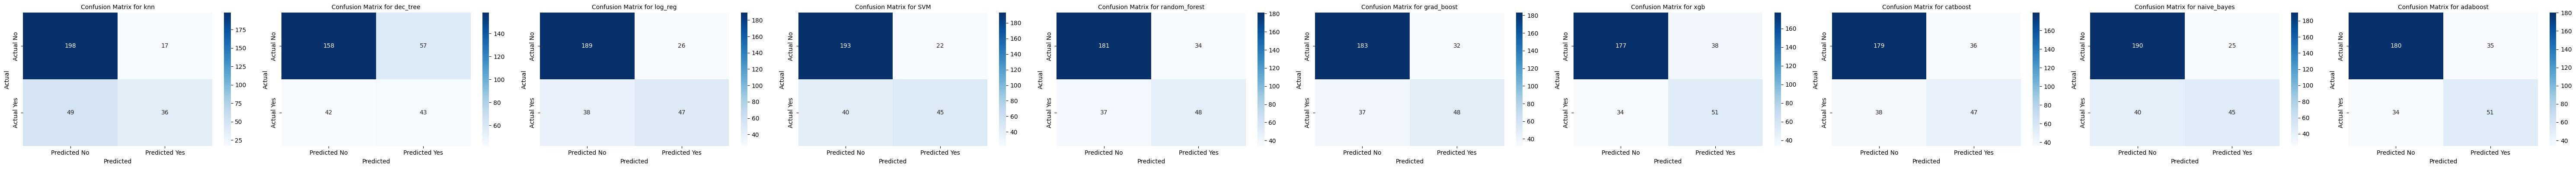

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Συνάρτηση για την πλοτάρισμα του confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'], ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title(f'Confusion Matrix for {model_name}', fontsize=10)

# Δημιουργία του καμβά με υποπλοκάκια
num_models = len(computed_estimators)
# Ορίστε τις επιθυμητές διαστάσεις για τον καμβά και τα υποπλοκάκια
figsize_per_subplot = (6, 4)  # Μέγεθος κάθε υποπλοκακίου
figsize = (num_models * figsize_per_subplot[0], figsize_per_subplot[1])  # Μέγεθος του καμβά με βάση τον αριθμό των μοντέλων
fig, axes = plt.subplots(nrows=1, ncols=num_models, figsize=figsize)

# Πλοτάρισμα του confusion matrix για κάθε μοντέλο
for i, (model_name, model) in enumerate(computed_estimators):
    pipe = Pipeline([("scaler", StandardScaler()), ("dim_red", PCA(n_components=5)), (model_name, model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name, axes[i])
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Mi

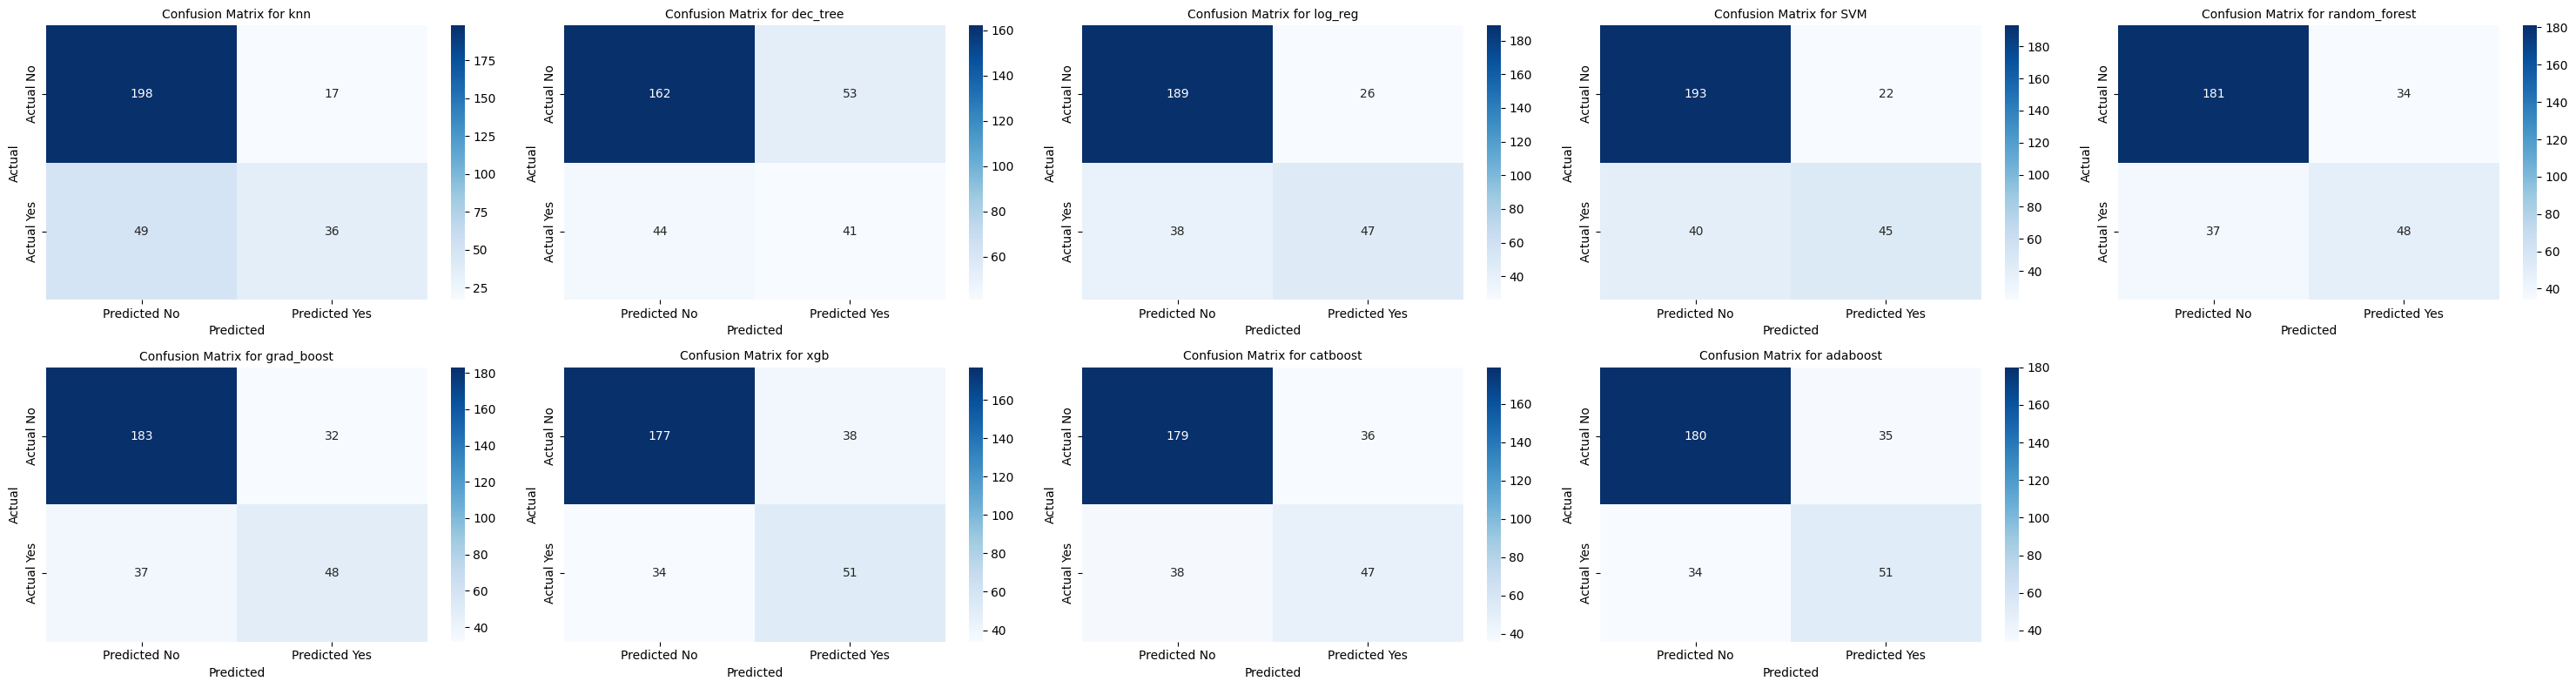

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Συνάρτηση για την πλοτάρισμα του confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'], ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title(f'Confusion Matrix for {model_name}', fontsize=10)

# Δημιουργία του καμβά με υποπλοκάκια σε δύο σειρές
num_models = len(computed_estimators)
num_per_row = 5  # Πόσα υποπλοκάκια ανά σειρά

# Υπολογισμός απαιτούμενων σειρών
num_rows = (num_models + num_per_row - 1) // num_per_row

figsize_per_subplot = (6, 4)  # Μέγεθος κάθε υποπλοκακίου
figsize = (num_per_row * figsize_per_subplot[0], num_rows * figsize_per_subplot[1])  # Μέγεθος του καμβά με βάση τον αριθμό των μοντέλων και τις σειρές

fig, axes = plt.subplots(nrows=num_rows, ncols=num_per_row, figsize=figsize)

# Πλοτάρισμα του confusion matrix για κάθε μοντέλο
for i, (model_name, model) in enumerate(computed_estimators):
    row = i // num_per_row  # Υπολογισμός σειράς
    col = i % num_per_row   # Υπολογισμός στήλης

    pipe = Pipeline([("scaler", StandardScaler()), ("dim_red", PCA(n_components=5)), (model_name, model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name, axes[row, col])

# Κρύψε τα άχρηστα υποπλοκάκια
for i in range(num_models, num_rows * num_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [ ]:
model_scores_df

,Model,Score
0,knn,0.780000
1,dec_tree,0.690000
2,log_reg,0.786667
3,SVM,0.793333
4,random_forest,0.766667
5,grad_boost,0.770000
6,xgb,0.760000
7,catboost,0.753333
8,adaboost,0.770000
9,mlp,0.780000


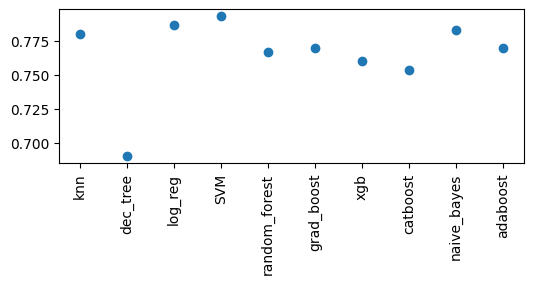

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 2))
plt.scatter(model_scores_df['Model'], model_scores_df['Score'])

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()


# ⏩ TOP 3 MODEL FOR THE AUTOAMATING ML PIPELINES (VOTING)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import random
np.random.seed(100)


X = recruitment_data.drop('HiringDecision', axis=1)
y = recruitment_data['HiringDecision']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_train.shape, y_train.shape, y_test.shape)

param_knn_grid = {
        'n_neighbors': list(range(2, 9, 2)),
        'p': [1, 2, random.random()]
    }


# param_dec_tree_grid = {
#         'criterion': ["gini", "entropy", "log_loss"],
#         'splitter': ["best", "random"]
#     }


param_log_reg_grid =  {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'solver': ['liblinear', 'saga'],
        'multi_class': ['auto', 'ovr', 'multinomial']
    }


param_svc_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'decision_function_shape': ['ovo', 'ovr']
    }

# param_rf_grid = {
#     "n_estimators": [100, 200, 300],
#     "max_features": ["auto", "sqrt", "log2"],
#     "max_depth": [4, 6, 8, 10],
#     "criterion": ["gini", "entropy"]
# }



# param_grad_boost_grid = {
#     "n_estimators": [100, 200, 300],
#     "learning_rate": [0.01, 0.1, 0.05],
#     "max_depth": [3, 4, 5]
# }



# param_xgb_grid = {
#     "n_estimators": [100, 200, 300],
#     "learning_rate": [0.01, 0.1, 0.05],
#     "max_depth": [3, 4, 5],
#     "colsample_bytree": [0.3, 0.7]
# }

# param_lgbm_grid = {
#     "n_estimators": [100, 200, 300],
#     "learning_rate": [0.01, 0.1, 0.05],
#     "max_depth": [3, 4, 5],
#     "num_leaves": [31, 50, 70]
# }


# param_catboost_grid = {
#     "iterations": [100, 200, 300],
#     "learning_rate": [0.01, 0.1, 0.05],
#     "depth": [3, 4, 5]
# }


# param_adaboost_grid = {
#     "n_estimators": [50, 100, 200],
#     "learning_rate": [0.01, 0.1, 0.05]
# }


# param_bagging_grid = {
#     "n_estimators": [10, 50, 100],
#     "max_samples": [0.5, 0.7, 1.0],
#     "max_features": [0.5, 0.7, 1.0]
# }


# param_extra_trees_grid = {
#     "n_estimators": [100, 200, 300],
#     "max_features": ["auto", "sqrt", "log2"],
#     "max_depth": [4, 6, 8, 10],
#     "criterion": ["gini", "entropy"]
# }


param_mlp_grid = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "activation": ["tanh", "relu"],
    "solver": ["sgd", "adam"],
    "alpha": [0.0001, 0.05],
    "learning_rate": ["constant", "adaptive"]
}


# estimators to explore
estimators_to_compute = [
    ("knn", GridSearchCV(KNeighborsClassifier(), param_knn_grid, cv = 5)), # cv = 5 : Χρήση StratifiedKFold μέσα στο GridSearchCV, όπου k = 5
    # ("dec_tree",GridSearchCV(DecisionTreeClassifier(),param_dec_tree_grid, cv = 5)),
    ("log_reg", GridSearchCV(LogisticRegression(), param_log_reg_grid, cv = 5)),
    ("SVM", GridSearchCV(SVC(probability=True), param_svc_grid, cv = 5))
    # ("random_forest",RandomForestClassifier()),
    # ("grad_boost", GradientBoostingClassifier()),
    # ("xgb", XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)),
    # ("lgbm", LGBMClassifier()),
    # ("catboost", CatBoostClassifier(verbose=0)),
    # ("naive_bayes", GaussianNB())
    # ("adaboost", AdaBoostClassifier()),
    # # ("bagging", BaggingClassifier()),
    # ("extra_trees", ExtraTreesClassifier()),
    # ("mlp", MLPClassifier(max_iter=1000))
]


computed_estimators = []
model_scores = []
# for each of the above estimators
for model_name, model in estimators_to_compute: # estimators_to_compute has tuples with 2 elements each
    # execute these steps: scaling, dimensionality reduction, apply model_name according to specifications in model
    # the pipeline knows it should use the best_estimator_ of the GridSearch, without any further coding by our side
    pipe=Pipeline([("scaler", StandardScaler()), ("dim_red", PCA(n_components=5)), (model_name, model)])
    pipe.fit(X_train,y_train) # do the fitting, fit_transform is executed automatically
    # done! get the accuracy score and the confusion matrix
    print(f"The ML pipeline of {pipe[2]}\n has a score of:  {pipe.score(X_test, y_test)}")
    print(f" and its confusion matrix is:\n {metrics.confusion_matrix(y_test, pipe.predict(X_test))}\n")
    computed_estimators.append((model_name,pipe[2])) # pipe [2] is the model e.g GridSearchCV(KNeighborsClassifier(), param_knn_grid))
    score = pipe.score(X_test, y_test)
    # append model name and score to the list
    model_scores.append((model_name, score))

# Now that we have the trained models, we build an ensemble learning pipeline as well
ensemble_pipe=Pipeline([('scaler', StandardScaler()), ("dim_red", PCA(n_components=5)), ("ensemble", VotingClassifier(computed_estimators, voting='hard'))])
ensemble_pipe.fit(X_train,y_train)
model_scores_df = pd.DataFrame(model_scores, columns=['Model', 'Score'])
print(f"The ML pipeline of {ensemble_pipe[2]}\n has a score of:  {ensemble_pipe.score(X_test, y_test)}")
print(f" and its confusion matrix is:\n {metrics.confusion_matrix(y_test, ensemble_pipe.predict(X_test))}")


(1200, 10) (1200, 10) (1200,) (300,)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Mi

The ML pipeline of GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8],
                         'p': [1, 2, 0.13428496561778258]})
 has a score of:  0.78
 and its confusion matrix is:
 [[198  17]
 [ 49  36]]



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
55 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

The ML pipeline of GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga']})
 has a score of:  0.7866666666666666
 and its confusion matrix is:
 [[189  26]
 [ 38  47]]

The ML pipeline of GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})
 has a score of:  0.7933333333333333
 and its confusion matrix is:
 [[193  22]
 [ 40  45]]



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Mi

The ML pipeline of VotingClassifier(estimators=[('knn',
                              GridSearchCV(cv=5,
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'n_neighbors': [2, 4, 6,
                                                                       8],
                                                       'p': [1, 2,
                                                             0.13428496561778258]})),
                             ('log_reg',
                              GridSearchCV(cv=5, estimator=LogisticRegression(),
                                           param_grid={'multi_class': ['auto',
                                                                       'ovr',
                                                                       'multinomial'],
                                                       'penalty': ['l1', 'l2',
                                                                 

In [ ]:
model_scores_df

,Model,Score
0,log_reg,0.786667
1,SVM,0.793333
2,naive_bayes,0.783333


# ⏩ Plot The Confusion Matrix for top 3 models

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Minkowski metrics are not distance metrics. Continuing the execution with `algorithm='brute'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:632: UserWarning: Mind that for 0 < p < 1, Mi

Confusion Matrix for knn:
[[198  17]
 [ 49  36]]
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
55 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

Confusion Matrix for log_reg:
[[189  26]
 [ 38  47]]
--------------------------------------------------
Confusion Matrix for SVM:
[[193  22]
 [ 40  45]]
--------------------------------------------------


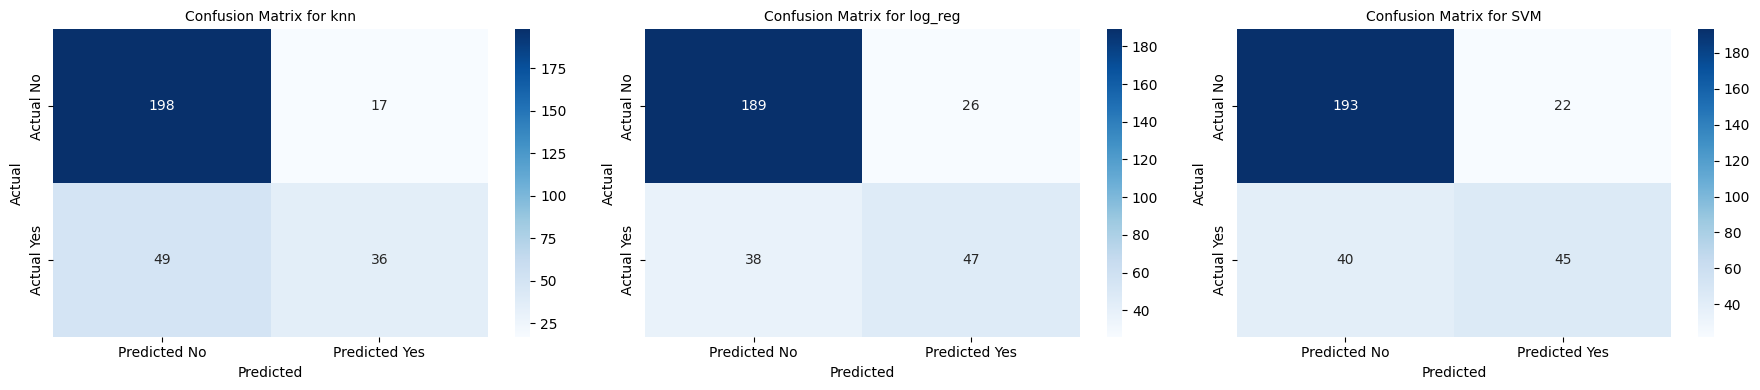

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Συνάρτηση για την πλοτάρισμα του confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'], ax=ax)#cmap='Blues'
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title(f'Confusion Matrix for {model_name}', fontsize=10)#ax.set_title(f'Confusion Matrix for {model_name}', fontsize=10)

# Δημιουργία του καμβά με υποπλοκάκια σε δύο σειρές
num_models = len(computed_estimators)
num_per_row = 3  # Πόσα υποπλοκάκια ανά σειρά

# Υπολογισμός απαιτούμενων σειρών
num_rows = (num_models + num_per_row - 1) // num_per_row

figsize_per_subplot = (6, 4)  # Μέγεθος κάθε υποπλοκακίου
figsize = (num_per_row * figsize_per_subplot[0], num_rows * figsize_per_subplot[1])  # Μέγεθος του καμβά με βάση τον αριθμό των μοντέλων και τις σειρές
# figsize = (10,8)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_per_row, figsize=figsize)

# Πλοτάρισμα του confusion matrix για κάθε μοντέλο
for i, (model_name, model) in enumerate(computed_estimators):
    row = i // num_per_row  # Υπολογισμός σειράς (πάνω ή κάτω)
    col = i % num_per_row   # Υπολογισμός στήλης (ποιο υποπλοκάκι)

    pipe = Pipeline([("scaler", StandardScaler()), ("dim_red", PCA(n_components=5)), (model_name, model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Handle the case when axes is 1D
    if num_rows == 1:
        plot_confusion_matrix(y_test, y_pred, model_name, axes[col]) # index with just col
    else:
        plot_confusion_matrix(y_test, y_pred, model_name, axes[row, col])

    print(f"Confusion Matrix for {model_name}:") #print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

plt.tight_layout()
plt.show()

In [ ]:
print(model_scores_df)
print(f"The ML pipeline of {ensemble_pipe[2]}\n has a score of:  {ensemble_pipe.score(X_test, y_test)}")

         Model     Score
0          knn  0.780000
1      log_reg  0.786667
2          SVM  0.793333
3  naive_bayes  0.783333
The ML pipeline of VotingClassifier(estimators=[('knn',
                              GridSearchCV(cv=5,
                                           estimator=KNeighborsClassifier(),
                                           param_grid={'n_neighbors': [2, 4, 6,
                                                                       8],
                                                       'p': [1, 2,
                                                             0.9520846246959518]})),
                             ('log_reg',
                              GridSearchCV(cv=5, estimator=LogisticRegression(),
                                           param_grid={'multi_class': ['auto',
                                                                       'ovr',
                                                                       'multinomial'],
                    

# ⏩INPUT VALUES

In [ ]:
Age =  int(input("Enter your Age(Description: Age of the candidate, Range: 20 to 50 years,Type: Integer.): "))
Gender =  int(input("Enter your gender(1: Male, 0: Female): "))
EducationLevel = int(input("Enter your EducationLevel(1: Bachelor's (Type 1),2: Bachelor's (Type 2),3: Master's,4: PhD): "))
ExperienceYears = int(input("Enter your ExperienceYears(Description: Number of years of professional experience, Range: 0 to 15 years,Type: Integer.): "))
PreviousCompanies = int(input("Enter your PreviousCompanies(Description: Number of previous companies where the candidate has worked, Range: 1 to 5 companies,Type: Integer.): "))
DistanceFromCompany = float(input("Enter your DistanceFromCompany(Description: Distance in kilometers from the candidate's residence to the hiring company, Range: 1 to 50 kilometers,Type: Float (continuous)): "))
InterviewScore = int(input("Enter your InterviewScore(Description: Score achieved by the candidate in the interview process, Range: 0 to 100,Type: Integer.): "))
SkillScore = int(input("Enter your SkillScore(Description: Assessment score of the candidate's technical skills, Range: 0 to 100,Type: Integer.): "))
PersonalityScore = int(input("Enter your PersonalityScore(Description: Evaluation score of the candidate's personality traits, Range: 0 to 100,Type: Integer.): "))
RecruitmentStrategy = int(input("Enter your RecruitmentStrategy(Description: Strategy adopted by the hiring team for recruitment, Categories: 1: Aggressive, 2: Moderate, 3: Conservative,Type: Categorical.): "))


data = {
    'Age': [Age],
    'Gender': [Gender],
    'EducationLevel': [EducationLevel],
    'ExperienceYears': [ExperienceYears],
    'PreviousCompanies': [PreviousCompanies],
    'DistanceFromCompany': [DistanceFromCompany],
    'InterviewScore': [InterviewScore],
    'SkillScore': [SkillScore],
    'PersonalityScore': [PersonalityScore],
    'RecruitmentStrategy': [RecruitmentStrategy]
    }

input_data = pd.DataFrame(data)
input_data

Enter your Age(Description: Age of the candidate, Range: 20 to 50 years,Type: Integer.): 25
Enter your gender(1: Male, 0: Female): 1
Enter your EducationLevel(1: Bachelor's (Type 1),2: Bachelor's (Type 2),3: Master's,4: PhD): 2
Enter your ExperienceYears(Description: Number of years of professional experience, Range: 0 to 15 years,Type: Integer.): 3
Enter your PreviousCompanies(Description: Number of previous companies where the candidate has worked, Range: 1 to 5 companies,Type: Integer.): 1
Enter your DistanceFromCompany(Description: Distance in kilometers from the candidate's residence to the hiring company, Range: 1 to 50 kilometers,Type: Float (continuous)): 25
Enter your InterviewScore(Description: Score achieved by the candidate in the interview process, Range: 0 to 100,Type: Integer.): 30
Enter your SkillScore(Description: Assessment score of the candidate's technical skills, Range: 0 to 100,Type: Integer.): 14
Enter your PersonalityScore(Description: Evaluation score of the ca

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,25,1,2,3,1,25.0,30,14,53,3


In [ ]:
input_data

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,25,1,2,3,1,25.0,30,14,53,3


In [ ]:
#OR FOR MORE THAN ONE PERSON GIVE ME A CSV FILE



# import pandas as pd
# input_data = pd.read_csv ("    ")
# input_data

# ⏩Predict for the input_data (HIRE ONLY THE QUALIFIED PERSON)

In [ ]:
# Προεπεξεργασία των δεδομένων εισόδου
input_data_scaled = ensemble_pipe.named_steps['scaler'].transform(input_data)
input_data_pca = ensemble_pipe.named_steps['dim_red'].transform(input_data_scaled)

# Πρόβλεψη με το ensemble μοντέλο
prediction = ensemble_pipe.named_steps['ensemble'].predict(input_data_pca)
print("Prediction for the new input data:", "Hire" if prediction[0] == 1 else "Do not Hire")

Prediction for the new input data: Do not Hire


# ⏩ enseble learning with mean

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import pandas as pd
import random

X = recruitment_data.drop('HiringDecision', axis=1)
y = recruitment_data['HiringDecision']

np.random.seed(100)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Parameter grids for hyperparameter tuning
param_knn_grid = {
        'n_neighbors': list(range(2, 9, 2)),
        'p': [1, 2, random.random()]
    }


# param_dec_tree_grid = {
#         'criterion': ["gini", "entropy", "log_loss"],
#         'splitter': ["best", "random"]
#     }


param_log_reg_grid =  {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'solver': ['liblinear', 'saga'],
        'multi_class': ['auto', 'ovr', 'multinomial']
    }


param_svc_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'decision_function_shape': ['ovo', 'ovr']
    }

# Estimators to explore
estimators_to_compute = [
    ("knn", GridSearchCV(KNeighborsClassifier(), param_knn_grid, cv=5)),
    # ("dec_tree", GridSearchCV(DecisionTreeClassifier(), param_dec_tree_grid, cv=5)),
    ("log_reg", GridSearchCV(LogisticRegression(), param_log_reg_grid, cv=5)),
    ("SVM", GridSearchCV(SVC(probability=True), param_svc_grid, cv=5))
    # ("random_forest", RandomForestClassifier()),
    # ("grad_boost", GradientBoostingClassifier()),
    # ("xgb", XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)),
    # ("naive_bayes", GaussianNB())
]

computed_estimators = []
model_scores = []
all_probabilities = []

# Training each model
for model_name, model in estimators_to_compute:
    pipe = Pipeline([("scaler", StandardScaler()), ("dim_red", PCA(n_components=5)), (model_name, model)])
    pipe.fit(X_train, y_train)
    print(f"The ML pipeline of {pipe[2]}\n has a score of:  {pipe.score(X_test, y_test)}")
    print(f" and its confusion matrix is:\n {metrics.confusion_matrix(y_test, pipe.predict(X_test))}\n")

    computed_estimators.append((model_name, pipe[2]))
    score = pipe.score(X_test, y_test)
    model_scores.append((model_name, score))

    # Collect the predicted probabilities
    all_probabilities.append(pipe.predict_proba(X_test))

# Averaging the predicted probabilities
mean_probabilities = np.mean(all_probabilities, axis=0)
final_predictions = np.argmax(mean_probabilities, axis=1)

# Evaluating the final ensemble model
ensemble_score = metrics.accuracy_score(y_test, final_predictions)
print(f"The ensemble model has a score of: {ensemble_score}")
print(f" and its confusion matrix is:\n {metrics.confusion_matrix(y_test, final_predictions)}")

# Creating a DataFrame for model scores
model_scores_df = pd.DataFrame(model_scores, columns=['Model', 'Score'])
print(model_scores_df)


(1200, 10) (300, 10) (1200,) (300,)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
55 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

The ML pipeline of GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga']})
 has a score of:  0.7866666666666666
 and its confusion matrix is:
 [[189  26]
 [ 38  47]]

The ML pipeline of GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})
 has a score of:  0.7933333333333333
 and its confusion matrix is:
 [[193  22]
 [ 40  45]]

The ML pipeline of GaussianNB()
 has a score of:  0.7833333333333333
 and its confusion matrix is:
 [[190  25]
 [ 40  45]]

The ensemble model has a score of: 0.79
 and its confusion matrix is:
 [[194  21]
 [ 42  43]]
         Model     Score
0      log_reg  0.786667
1          SVM  0.793333
2  naive_bayes  0.783333


In [ ]:
model_scores_df

,Model,Score
0,log_reg,0.786667
1,SVM,0.793333
2,naive_bayes,0.783333


# ⏩ enseble learning with median

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import pandas as pd
import random

X = recruitment_data.drop('HiringDecision', axis=1)
y = recruitment_data['HiringDecision']

np.random.seed(100)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Parameter grids for hyperparameter tuning
param_knn_grid = {
        'n_neighbors': list(range(2, 9, 2)),
        'p': [1, 2, random.random()]
    }


# param_dec_tree_grid = {
#         'criterion': ["gini", "entropy", "log_loss"],
#         'splitter': ["best", "random"]
#     }


param_log_reg_grid =  {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'solver': ['liblinear', 'saga'],
        'multi_class': ['auto', 'ovr', 'multinomial']
    }


param_svc_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'decision_function_shape': ['ovo', 'ovr']
    }

# Estimators to explore
estimators_to_compute = [
    # ("knn", GridSearchCV(KNeighborsClassifier(), param_knn_grid, cv=5)),
    # ("dec_tree", GridSearchCV(DecisionTreeClassifier(), param_dec_tree_grid, cv=5)),
    ("log_reg", GridSearchCV(LogisticRegression(), param_log_reg_grid, cv=5)),
    ("SVM", GridSearchCV(SVC(probability=True), param_svc_grid, cv=5)),
    # ("random_forest", RandomForestClassifier()),
    # ("grad_boost", GradientBoostingClassifier()),
    # ("xgb", XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)),
    ("naive_bayes", GaussianNB())
]

computed_estimators = []
model_scores = []
all_probabilities = []

# Training each model
for model_name, model in estimators_to_compute:
    pipe = Pipeline([("scaler", StandardScaler()), ("dim_red", PCA(n_components=5)), (model_name, model)])
    pipe.fit(X_train, y_train)
    print(f"The ML pipeline of {pipe[2]}\n has a score of:  {pipe.score(X_test, y_test)}")
    print(f" and its confusion matrix is:\n {metrics.confusion_matrix(y_test, pipe.predict(X_test))}\n")

    computed_estimators.append((model_name, pipe[2]))
    score = pipe.score(X_test, y_test)
    model_scores.append((model_name, score))

    # Collect the predicted probabilities
    all_probabilities.append(pipe.predict_proba(X_test))

# Averaging the predicted probabilities
median_probabilities = np.median(all_probabilities, axis=0)
final_predictions = np.argmax(median_probabilities , axis=1)

# Evaluating the final ensemble model
ensemble_score = metrics.accuracy_score(y_test, final_predictions)
print(f"The ensemble model has a score of: {ensemble_score}")
print(f" and its confusion matrix is:\n {metrics.confusion_matrix(y_test, final_predictions)}")

# Creating a DataFrame for model scores
model_scores_df = pd.DataFrame(model_scores, columns=['Model', 'Score'])
print(model_scores_df)


(1200, 10) (300, 10) (1200,) (300,)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
55 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

The ML pipeline of GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga']})
 has a score of:  0.7866666666666666
 and its confusion matrix is:
 [[189  26]
 [ 38  47]]

The ML pipeline of GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})
 has a score of:  0.7933333333333333
 and its confusion matrix is:
 [[193  22]
 [ 40  45]]

The ML pipeline of GaussianNB()
 has a score of:  0.7833333333333333
 and its confusion matrix is:
 [[190  25]
 [ 40  45]]

The ensemble model has a score of: 0.7866666666666666
 and its confusion matrix is:
 [[193  22]
 [ 42  43]]
         Model     Score
0      log_reg  0.786667
1          SVM  0.793333
2  naive_bayes  0.783333
